# Import and Install needed packages

In [1]:
import numpy as np 
import pandas as pd

! pip install pgeocode
import pgeocode

! pip install folium==0.5.0
import folium 

from geopy.geocoders import Nominatim

import json
import requests # library to handle requests
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import seaborn as sns
from matplotlib import pyplot as plt

print('Libraries imported.')

Libraries imported.


# SCRAPE WEB FOR BOSTON DATA

In [2]:
url='https://en.wikipedia.org/wiki/Boston#Demographic_breakdown_by_ZIP_Code'
dfs = pd.read_html(url)
df = dfs[9]
df.head()

,Rank,ZIP code (ZCTA),Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,02110 (Financial District),"$152,007","$123,795","$196,518",1486,981
1,2.0,02199 (Prudential Center),"$151,060","$107,159","$146,786",1290,823
2,3.0,02210 (Fort Point),"$93,078","$111,061","$223,411",1905,1088
3,4.0,02109 (North End),"$88,921","$128,022","$162,045",4277,2190
4,5.0,02116 (Back Bay/Bay Village),"$81,458","$87,630","$134,875",21318,10938


# Break out zip and neighborhood from one column into 2. 
# Secondly remove all uneeded columns

In [3]:
#Split out zip code from neighborhoods
new = df["ZIP code (ZCTA)"].str.split(" ", n=1, expand= True)
df["Zip"] = new[0]
df["Neighborhood"] = new[1]

#Remove trailing paren from Neighborhood
new2 = df["Neighborhood"].str.split(")", n=1, expand = True)
df["Neighborhood"] = new2[0]

#Remove LEADING paren from Neighborhood
df['Neighborhood'] = df['Neighborhood'].str.replace('(','')

#drop NaN's
df_Bos = df.dropna()

#Zip Code has blank spaces, need to trim
df_Bos['Zip'] = df_Bos['Zip'].str[:5]

#Eliminate uneeded data
df_Bos = df_Bos[["Zip","Neighborhood"]]

df_Bos

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Zip,Neighborhood
0,02110,Financial District
1,02199,Prudential Center
2,02210,Fort Point
3,02109,North End
4,02116,Back Bay/Bay Village
5,02108,Beacon Hill/Financial District
6,02114,Beacon Hill/West End
7,02111,Chinatown/Financial District/Leather District
8,02129,Charlestown
9,02467,Chestnut Hill


# Install another package for getting latitude and longitude

In [4]:
! pip install geopandas
import geopandas
print('Libraries imported.')

Libraries imported.


# LETS GEOCODE
# SET AREA TO USA

In [5]:

nomi = pgeocode.Nominatim('us')

 # create empty lists
list_lat = []  
list_long = []

#loop thru df to get lat lon of each postal code and assign 
for index, row in df_Bos.iterrows():
    zc = (row['Zip'])
    location = nomi.query_postal_code(zc)
    lat = location.latitude
    long = location.longitude
    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    

df_Bos['Latitude'] = list_lat   
df_Bos['Longitude'] = list_long

#CHECK OUTPUT
df_Bos



,Zip,Neighborhood,Latitude,Longitude
0,02110,Financial District,42.3576,-71.0514
1,02199,Prudential Center,42.3479,-71.0825
2,02210,Fort Point,42.3489,-71.0465
3,02109,North End,42.3600,-71.0545
4,02116,Back Bay/Bay Village,42.3492,-71.0768
5,02108,Beacon Hill/Financial District,42.3576,-71.0684
6,02114,Beacon Hill/West End,42.3611,-71.0682
7,02111,Chinatown/Financial District/Leather District,42.3503,-71.0629
8,02129,Charlestown,42.3778,-71.0627
9,02467,Chestnut Hill,42.3164,-71.1612


# prepare for mapping 
# set up data

In [6]:

address = 'Boston, MA'

geolocator = Nominatim(user_agent="bos_mapper")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Boston, MA are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Boston, MA are 42.3602534, -71.0582912.


# create map of Boston using latitude and longitude values

In [7]:

map_Boston = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map

In [8]:

for lat, lng, label in zip(df_Bos['Latitude'], df_Bos['Longitude'], df_Bos['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boston)  
    
map_Boston

# setup Foursquare params

In [9]:

CLIENT_ID = 'QMTNUJWR0JEVBTRM5KWPS5RQSTUBVMBBQLJDLNWUYX1WTKYN' # your Foursquare ID
CLIENT_SECRET = 'USEHN4ALWK0WLFJZV0MBI5A2PDIRBJFHNQUFYAZWST4MWLGE' # your Foursquare Secret
VERSION = '20190607' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
CATEG = '4d4b7105d754a06374d81259'


# create function to get all neighborhood venues

In [10]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            CATEG)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# run function on all Boston neighborhoods

In [11]:

Boston_venues = getNearbyVenues(names=df_Bos['Neighborhood'],
                                   latitudes=df_Bos['Latitude'],
                                   longitudes=df_Bos['Longitude']
                                  )
print('Function complete')

Financial District
Prudential Center
Fort Point
North End
Back Bay/Bay Village
Beacon Hill/Financial District
Beacon Hill/West End
Chinatown/Financial District/Leather District
Charlestown
Chestnut Hill
North End
West Roxbury
South End
Jamaica Plain
South Boston
Brighton
Roslindale
Hyde Park
Allston
East Boston
Dorchester-Fields Corner
Dorchester-Codman Square-Ashmont
Dorchester-Uphams Corner-Savin Hill
Allston-Harvard Business School
Back Bay, Longwood, Museum of Fine Arts/Symphony Hall area
Mattapan
Fenway-Kenmore
Roxbury
Dorchester-Mount Bowdoin
Mission Hill
Function complete


# check unique categories

In [12]:

print('There are {} uniques categories.'.format(len(Boston_venues['Venue Category'].unique())))


There are 75 uniques categories.


# analyze neighbourhoods using onehot encoding

In [13]:

# one hot encoding
Boston_onehot = pd.get_dummies(Boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Boston_onehot['Neighborhood'] = Boston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Boston_onehot.columns[-1]] + list(Boston_onehot.columns[:-1])
Boston_onehot = Boston_onehot[fixed_columns]

Boston_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,...,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Financial District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Financial District,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Financial District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Financial District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Financial District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Group categories and get frequency per neighborhood

In [14]:

Boston_grouped = Boston_onehot.groupby('Neighborhood').mean().reset_index()
Boston_grouped

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,...,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Allston,0.000000,0.012048,0.000000,0.060241,0.00,0.000000,0.000000,0.048193,0.000000,...,0.000000,0.048193,0.000000,0.012048,0.000000,0.036145,0.000000,0.024096,0.012048,0.00
1,Allston-Harvard Business School,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Back Bay, Longwood, Museum of Fine Arts/Sympho...",0.000000,0.120000,0.000000,0.000000,0.00,0.000000,0.000000,0.120000,0.000000,...,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.00
3,Back Bay/Bay Village,0.000000,0.117647,0.000000,0.044118,0.00,0.000000,0.014706,0.044118,0.000000,...,0.029412,0.014706,0.000000,0.000000,0.000000,0.014706,0.000000,0.014706,0.000000,0.00
4,Beacon Hill/Financial District,0.000000,0.161290,0.000000,0.000000,0.00,0.000000,0.032258,0.032258,0.000000,...,0.000000,0.064516,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.00
5,Beacon Hill/West End,0.000000,0.093750,0.000000,0.000000,0.00,0.031250,0.031250,0.031250,0.000000,...,0.000000,0.031250,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.00
6,Brighton,0.000000,0.050000,0.000000,0.000000,0.00,0.000000,0.000000,0.150000,0.000000,...,0.000000,0.050000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.00
7,Charlestown,0.000000,0.050000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.00
8,Chinatown/Financial District/Leather District,0.000000,0.023256,0.000000,0.104651,0.00,0.000000,0.000000,0.093023,0.000000,...,0.011628,0.046512,0.011628,0.000000,0.000000,0.000000,0.000000,0.011628,0.011628,0.00
9,Dorchester-Codman Square-Ashmont,0.000000,0.000000,0.000000,0.000000,0.00,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


# Check the top 5 venues in each neighborhood

In [15]:

num_top_venues = 5

for hood in Boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Boston_grouped[Boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                venue  freq
0   Korean Restaurant  0.11
1         Pizza Place  0.10
2  Chinese Restaurant  0.07
3    Asian Restaurant  0.06
4    Sushi Restaurant  0.05


----Allston-Harvard Business School----
                       venue  freq
0       Ethiopian Restaurant  0.25
1                  Gastropub  0.12
2         Chinese Restaurant  0.12
3             Sandwich Place  0.12
4  Latin American Restaurant  0.12


----Back Bay, Longwood, Museum of Fine Arts/Symphony Hall area----
                 venue  freq
0          Pizza Place  0.20
1  American Restaurant  0.12
2               Bakery  0.12
3           Restaurant  0.08
4     Sushi Restaurant  0.04


----Back Bay/Bay Village----
                     venue  freq
0      American Restaurant  0.12
1       Italian Restaurant  0.10
2       Seafood Restaurant  0.07
3       Mexican Restaurant  0.06
4  New American Restaurant  0.06


----Beacon Hill/Financial District----
                 venue  freq
0  American Restaurant

# set up sorting function

In [16]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# make a new df for the top 5 venues in each hood

In [17]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Boston_grouped['Neighborhood']

for ind in np.arange(Boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allston,Korean Restaurant,Pizza Place,Chinese Restaurant,Asian Restaurant,Sushi Restaurant
1,Allston-Harvard Business School,Ethiopian Restaurant,Gastropub,Sandwich Place,Latin American Restaurant,Chinese Restaurant
2,"Back Bay, Longwood, Museum of Fine Arts/Sympho...",Pizza Place,American Restaurant,Bakery,Restaurant,Greek Restaurant
3,Back Bay/Bay Village,American Restaurant,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,New American Restaurant
4,Beacon Hill/Financial District,American Restaurant,Pizza Place,French Restaurant,Italian Restaurant,Restaurant


# Set up k-mean clusters. I'm choosing 7

In [18]:
# set number of clusters
kclusters = 7

Boston_grouped_clustering = Boston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([0, 4, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int32)

# More cluster stuff

In [19]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Boston_merged1 = df_Bos

# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborhood
Boston_merged1 = Boston_merged1.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#this neighborhood has no food, lets drop
Boston_merged = Boston_merged1.drop(9) 

Boston_merged['Cluster Labels'] = Boston_merged['Cluster Labels'].astype(int) 

Boston_merged.head(10) # check the last columns!

,Zip,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,02110,Financial District,42.3576,-71.0514,1,Seafood Restaurant,American Restaurant,Italian Restaurant,Greek Restaurant,Donut Shop
1,02199,Prudential Center,42.3479,-71.0825,1,American Restaurant,Italian Restaurant,Seafood Restaurant,Food Truck,Korean Restaurant
2,02210,Fort Point,42.3489,-71.0465,1,Café,Food Truck,Restaurant,Sandwich Place,Italian Restaurant
3,02109,North End,42.3600,-71.0545,1,Italian Restaurant,Seafood Restaurant,Bakery,Pizza Place,Sandwich Place
4,02116,Back Bay/Bay Village,42.3492,-71.0768,1,American Restaurant,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,New American Restaurant
5,02108,Beacon Hill/Financial District,42.3576,-71.0684,1,American Restaurant,Pizza Place,French Restaurant,Italian Restaurant,Restaurant
6,02114,Beacon Hill/West End,42.3611,-71.0682,1,Pizza Place,Italian Restaurant,American Restaurant,Breakfast Spot,Food Truck
7,02111,Chinatown/Financial District/Leather District,42.3503,-71.0629,0,Chinese Restaurant,Asian Restaurant,Bakery,Café,Mexican Restaurant
8,02129,Charlestown,42.3778,-71.0627,0,Pizza Place,Café,Donut Shop,Moroccan Restaurant,Restaurant
10,02113,North End,42.3657,-71.0560,1,Italian Restaurant,Seafood Restaurant,Bakery,Pizza Place,Sandwich Place


# Prepare to map

In [20]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Boston_merged['Latitude'], Boston_merged['Longitude'], Boston_merged['Neighborhood'], Boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine the clusters

In [21]:
#cluster 1
Boston_merged.loc[Boston_merged['Cluster Labels'] == 0, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Chinatown/Financial District/Leather District,Chinese Restaurant,Asian Restaurant,Bakery,Café,Mexican Restaurant
8,Charlestown,Pizza Place,Café,Donut Shop,Moroccan Restaurant,Restaurant
12,South End,Donut Shop,Asian Restaurant,Food Truck,Breakfast Spot,Diner
13,Jamaica Plain,Pizza Place,New American Restaurant,Bakery,Noodle House,Donut Shop
14,South Boston,Pizza Place,Italian Restaurant,New American Restaurant,Breakfast Spot,Diner
18,Brighton,Chinese Restaurant,Bakery,Pizza Place,Café,Deli / Bodega
22,Allston,Korean Restaurant,Pizza Place,Chinese Restaurant,Asian Restaurant,Sushi Restaurant
28,"Back Bay, Longwood, Museum of Fine Arts/Sympho...",Pizza Place,American Restaurant,Bakery,Restaurant,Greek Restaurant
33,Mission Hill,Pizza Place,Café,Bakery,Donut Shop,Burger Joint


In [22]:
# Cluster 2
Boston_merged.loc[Boston_merged['Cluster Labels'] == 1, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Financial District,Seafood Restaurant,American Restaurant,Italian Restaurant,Greek Restaurant,Donut Shop
1,Prudential Center,American Restaurant,Italian Restaurant,Seafood Restaurant,Food Truck,Korean Restaurant
2,Fort Point,Café,Food Truck,Restaurant,Sandwich Place,Italian Restaurant
3,North End,Italian Restaurant,Seafood Restaurant,Bakery,Pizza Place,Sandwich Place
4,Back Bay/Bay Village,American Restaurant,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,New American Restaurant
5,Beacon Hill/Financial District,American Restaurant,Pizza Place,French Restaurant,Italian Restaurant,Restaurant
6,Beacon Hill/West End,Pizza Place,Italian Restaurant,American Restaurant,Breakfast Spot,Food Truck
10,North End,Italian Restaurant,Seafood Restaurant,Bakery,Pizza Place,Sandwich Place
19,Roslindale,Bakery,American Restaurant,Chinese Restaurant,Greek Restaurant,Italian Restaurant
21,Hyde Park,American Restaurant,Pizza Place,Caribbean Restaurant,Italian Restaurant,Fried Chicken Joint


In [23]:
# Cluster 3
Boston_merged.loc[Boston_merged['Cluster Labels'] == 2, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
24,Dorchester-Fields Corner,Food,Café,Pizza Place,Fried Chicken Joint,Breakfast Spot
26,Dorchester-Uphams Corner-Savin Hill,Food,Café,Pizza Place,Fried Chicken Joint,Breakfast Spot
32,Dorchester-Mount Bowdoin,Food,Café,Pizza Place,Fried Chicken Joint,Breakfast Spot


In [24]:
# Cluster 4
Boston_merged.loc[Boston_merged['Cluster Labels'] == 3, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
31,Roxbury,Food,Snack Place,Pizza Place,Wings Joint,Donut Shop


In [25]:
# Cluster 5
Boston_merged.loc[Boston_merged['Cluster Labels'] == 4, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
27,Allston-Harvard Business School,Ethiopian Restaurant,Gastropub,Sandwich Place,Latin American Restaurant,Chinese Restaurant


In [26]:
# Cluster 6
Boston_merged.loc[Boston_merged['Cluster Labels'] == 5, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,Mattapan,Pizza Place,Hot Dog Joint,Caribbean Restaurant,Bakery,Donut Shop


In [27]:
# Cluster 7
Boston_merged.loc[Boston_merged['Cluster Labels'] == 6, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,West Roxbury,Chinese Restaurant,Donut Shop,Mediterranean Restaurant,Pizza Place,Food


# Combine venues to prepare for graphing

In [28]:
RingSub1 = Boston_merged.loc[Boston_merged['Cluster Labels'] == 1]

Ring1_1 = RingSub1[['Cluster Labels','1st Most Common Venue']]
Ring1_1.rename(columns = {'1st Most Common Venue' : 'Venue'}, inplace=True)

Ring1_2 = RingSub1[['Cluster Labels','2nd Most Common Venue']]
Ring1_2.rename(columns = {'2nd Most Common Venue' : 'Venue'}, inplace=True)
Ring1_3 = RingSub1[['Cluster Labels','3rd Most Common Venue']]
Ring1_3.rename(columns = {'3rd Most Common Venue' : 'Venue'}, inplace=True)
Ring1_4 = RingSub1[['Cluster Labels','4th Most Common Venue']]
Ring1_4.rename(columns = {'4th Most Common Venue' : 'Venue'}, inplace=True)
Ring1_5 = RingSub1[['Cluster Labels','5th Most Common Venue']]
Ring1_5.rename(columns = {'5th Most Common Venue' : 'Venue'}, inplace=True)
                    
RingSet1 = [Ring1_1,Ring1_2,Ring1_3,Ring1_4,Ring1_5]
                   
Ring1A = pd.concat(RingSet1)  

Ring1 = pd.DataFrame(Ring1A.groupby('Cluster Labels')['Venue'].value_counts())
Ring1.rename(columns={'Venue' : 'Count'}, inplace = True)
Ring1Final = Ring1.head()
Ring1Final['Venue'] = Ring1Final.index
Ring1Final

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Count                     Venue
Cluster Labels Venue                                               
1              Italian Restaurant      10   (1, Italian Restaurant)
               American Restaurant      9  (1, American Restaurant)
               Pizza Place              5          (1, Pizza Place)
               Seafood Restaurant       5   (1, Seafood Restaurant)
               Bakery                   3               (1, Bakery)

# Graph restaurant types in the first cluster for analysis

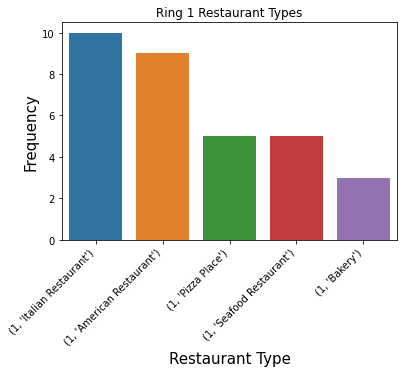

<Figure size 1296x504 with 0 Axes>

In [29]:

s=sns.barplot(x="Venue", y="Count", data=Ring1Final)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Ring 1 Restaurant Types')
plt.xlabel("Restaurant Type", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

# Prepare to graph second cluster

In [30]:
RingSub2 = Boston_merged.loc[Boston_merged['Cluster Labels'] == 0]

Ring2_1 = RingSub2[['Cluster Labels','1st Most Common Venue']]
Ring2_1.rename(columns = {'1st Most Common Venue' : 'Venue'}, inplace=True)

Ring2_2 = RingSub2[['Cluster Labels','2nd Most Common Venue']]
Ring2_2.rename(columns = {'2nd Most Common Venue' : 'Venue'}, inplace=True)
Ring2_3 = RingSub2[['Cluster Labels','3rd Most Common Venue']]
Ring2_3.rename(columns = {'3rd Most Common Venue' : 'Venue'}, inplace=True)
Ring2_4 = RingSub2[['Cluster Labels','4th Most Common Venue']]
Ring2_4.rename(columns = {'4th Most Common Venue' : 'Venue'}, inplace=True)
Ring2_5 = RingSub2[['Cluster Labels','5th Most Common Venue']]
Ring2_5.rename(columns = {'5th Most Common Venue' : 'Venue'}, inplace=True)
                    
RingSet2 = [Ring2_1,Ring2_2,Ring2_3,Ring2_4,Ring2_5]
                   
Ring2A = pd.concat(RingSet2)  

Ring2 = pd.DataFrame(Ring2A.groupby('Cluster Labels')['Venue'].value_counts())
Ring2.rename(columns={'Venue' : 'Count'}, inplace = True)
Ring2Final = Ring2.head()
Ring2Final['Venue'] = Ring2Final.index
Ring2Final

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Count                  Venue
Cluster Labels Venue                                         
0              Pizza Place           7       (0, Pizza Place)
               Bakery                5            (0, Bakery)
               Café                  4              (0, Café)
               Donut Shop            4        (0, Donut Shop)
               Asian Restaurant      3  (0, Asian Restaurant)

# Graph restaurants in the second cluster

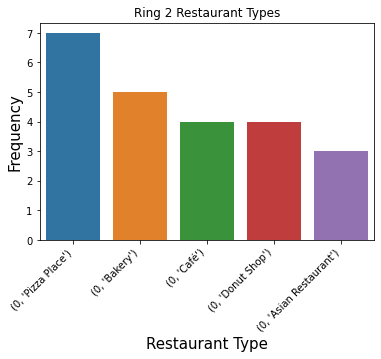

<Figure size 1296x504 with 0 Axes>

In [31]:
s=sns.barplot(x="Venue", y="Count", data=Ring2Final)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Ring 2 Restaurant Types')
plt.xlabel("Restaurant Type", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()